In [1]:
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
train_data = pd.read_csv('data/train.csv', low_memory=False)
test_data = pd.read_csv('data/test.csv', low_memory=False)

In [11]:
test_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [12]:
train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


Lets check the distribution of categorical features across training data and test data

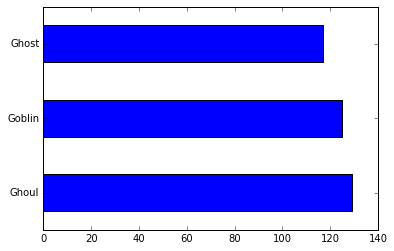

In [6]:
train_data.type.value_counts().plot('barh')

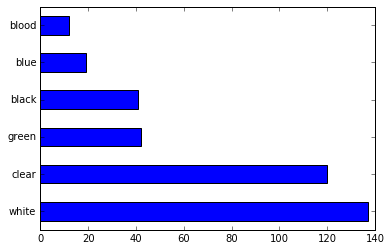

In [10]:
train_data.color.value_counts().plot('barh')

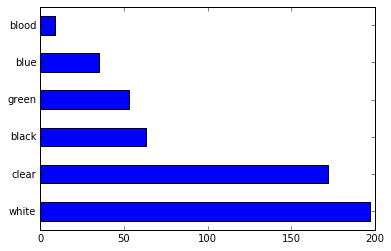

In [9]:
test_data.color.value_counts().plot('barh')

The data seems to be well distributed. Lets check the mean of all numerical features across type & color

In [14]:
train_data.groupby('type')['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'].describe()

bone_length  rotting_flesh  hair_length    has_soul
type                                                             
Ghost  count   117.000000     117.000000   117.000000  117.000000
       mean      0.347466       0.593759     0.373186    0.320023
       std       0.117748       0.142150     0.117642    0.139790
       min       0.061032       0.165539     0.134600    0.009402
       25%       0.269748       0.504399     0.299507    0.230361
       50%       0.340442       0.603780     0.365142    0.307534
       75%       0.417253       0.682687     0.461068    0.415930
       max       0.622371       0.932466     0.636340    0.689980
Ghoul  count   129.000000     129.000000   129.000000  129.000000
       mean      0.517159       0.490515     0.655550    0.601634
       std       0.120600       0.115357     0.138127    0.134813
       min       0.200753       0.172182     0.287008    0.280854
       25%       0.439625       0.417474     0.556691    0.501544
       50%       0.515397       0.491497     0.667384    0.600393
       75%       0.590384       0.561786     0.751614    0.698480
       max       0.817001       0.779153     1.000000    0.935721
Goblin count   125.000000     125.000000   125.000000  125.000000
       mean      0.429650       0.442357     0.544581    0.478663
       std       0.101917       0.140284     0.116964    0.127293
       min       0.208625       0.095687     0.239212    0.194413
       25%       0.355313       0.341187     0.474255    0.377121
       50%       0.430797       0.457490     0.558776    0.466024
       75%       0.492438       0.530852     0.621787    0.557136
       max       0.678519       0.840049     0.840013    0.854949

In [15]:
train_data.groupby('color')['bone_length', 'rotting_flesh', 'hair_length', 'has_soul'].describe()

bone_length  rotting_flesh  hair_length    has_soul
color                                                           
black count    41.000000      41.000000    41.000000   41.000000
      mean      0.447786       0.538532     0.517582    0.457945
      std       0.138316       0.139279     0.169622    0.182122
      min       0.061032       0.095687     0.230619    0.055464
      25%       0.356999       0.471580     0.406791    0.347765
      50%       0.465423       0.554114     0.515442    0.462295
      75%       0.504236       0.605206     0.616847    0.570073
      max       0.776652       0.815466     1.000000    0.884464
blood count    12.000000      12.000000    12.000000   12.000000
      mean      0.403458       0.531120     0.499491    0.477230
      std       0.121410       0.144056     0.211109    0.180663
      min       0.184172       0.259701     0.134600    0.179642
      25%       0.349711       0.463865     0.370882    0.359328
      50%       0.407121       0.548506     0.531471    0.503441
      75%       0.480149       0.631357     0.680878    0.585440
      max       0.649559       0.715131     0.740270    0.740579
blue  count    19.000000      19.000000    19.000000   19.000000
      mean      0.481672       0.549136     0.461715    0.525404
      std       0.144642       0.158299     0.156330    0.192333
      min       0.209997       0.172182     0.195365    0.227548
      25%       0.366754       0.470553     0.343613    0.369855
      50%       0.476892       0.539712     0.417267    0.526718
      75%       0.615112       0.624433     0.587116    0.667133
      max       0.687080       0.929440     0.751614    0.856757
clear count   120.000000     120.000000   120.000000  120.000000
      mean      0.426179       0.479179     0.556542    0.486162
      std       0.133646       0.143423     0.156436    0.159298
      min       0.145071       0.165539     0.176882    0.036457
      25%       0.333948       0.382660     0.461347    0.383895
      50%       0.425855       0.464280     0.575954    0.497295
      75%       0.502740       0.568810     0.661384    0.591716
      max       0.730848       0.932466     0.883088    0.935721
green count    42.000000      42.000000    42.000000   42.000000
      mean      0.447810       0.512057     0.532017    0.436679
      std       0.140052       0.150870     0.167335    0.197184
      min       0.184383       0.221793     0.249337    0.009402
      25%       0.329242       0.410350     0.415760    0.295102
      50%       0.441534       0.516175     0.528019    0.441629
      75%       0.522000       0.607094     0.640708    0.544848
      max       0.817001       0.875862     0.901810    0.907712
white count   137.000000     137.000000   137.000000  137.000000
      mean      0.428988       0.512015     0.519593    0.465119
      std       0.127588       0.146287     0.178516    0.179194
      min       0.100945       0.158742     0.162715    0.064468
      25%       0.340442       0.417474     0.373743    0.332592
      50%       0.415110       0.505963     0.515815    0.460081
      75%       0.523789       0.621063     0.653855    0.609616
      max       0.755298       0.811583     0.965569    0.854949

In [21]:
train_data.groupby(['type', 'color']).id.count()

type    color
Ghost   black    14
        blood     6
        blue      6
        clear    32
        green    15
        white    44
Ghoul   black    14
        blood     4
        blue      6
        clear    42
        green    13
        white    50
Goblin  black    13
        blood     2
        blue      7
        clear    46
        green    14
        white    43
Name: id, dtype: int64

In [23]:
test_data.groupby(['color']).id.count()

color
black     63
blood      9
blue      35
clear    172
green     53
white    197
Name: id, dtype: int64

In [29]:
train_data['combined_var'] = (train_data.bone_length * .15) + (train_data.rotting_flesh * .21) + (train_data.hair_length * .32) + (train_data.has_soul * .32)

In [32]:
pd.melt(train_data[['bone_length','rotting_flesh','hair_length','has_soul','type']], id_vars='type')

,type,variable,value
0,Ghoul,bone_length,0.354512
1,Goblin,bone_length,0.575560
2,Ghoul,bone_length,0.467875
3,Ghoul,bone_length,0.776652
4,Ghost,bone_length,0.566117
5,Goblin,bone_length,0.405680
6,Goblin,bone_length,0.399331
7,Ghoul,bone_length,0.516224
8,Ghost,bone_length,0.314295
9,Ghost,bone_length,0.280942
